In [27]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import time

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import yaml
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [8]:
with open('config.yaml', 'r') as f:
    config = yaml.load(f)

print(config)

{'PATH': {'PROJECT_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD', 'SCRIPT_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\scripts', 'MODELS_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\models', 'DATA_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\data', 'ANALYSIS_REPORTS_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\documents\\Analysis\\'}}


In [9]:
X_train = pd.read_csv(os.path.join(config['PATH']['DATA_PATH'], 'X_train.csv'))
X_test = pd.read_csv(os.path.join(config['PATH']['DATA_PATH'], 'X_test.csv'))
print(X_train.head())
print('-----------------------------------------------------------------------')
print(X_test.head())

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.863636         0.4         1.0      0.75         0.6     0

In [11]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

features = pd.read_csv(os.path.join(config['PATH']['DATA_PATH'], 'selected_features.csv'))
features = list(features['0'])

features = features + ['LotFrontage']

X_train = X_train[features]
X_test = X_test[features]

print(X_train.shape, X_test.shape)

(1314, 23) (146, 23)


In [12]:
## Regularized linear regression

lin_model = Lasso(alpha = 0.005, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
pred = lin_model.predict(X_train)
print('train rmse:', sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))

pred = lin_model.predict(X_test)
print('test rmse:', sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))

train rmse: 32976.28565259365
test rmse: 37486.791704006944


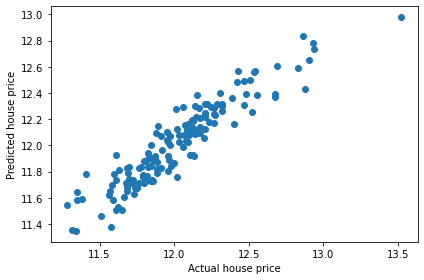

In [16]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('Actual house price')
plt.ylabel('Predicted house price')
plt.tight_layout()
plt.show()

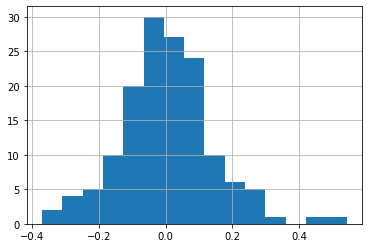

In [18]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins = 15)

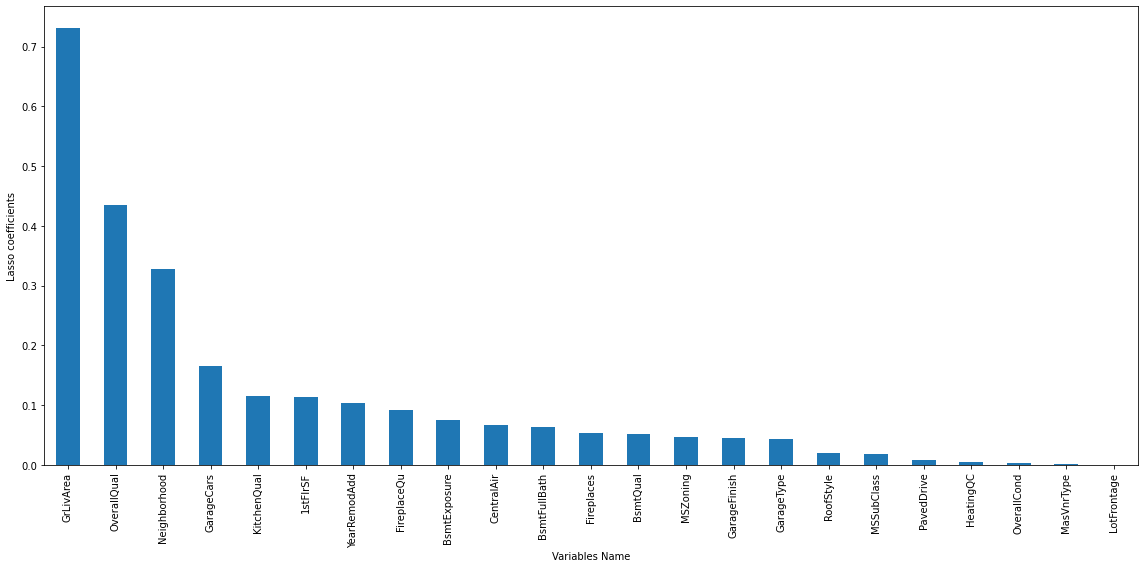

In [26]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (16,8))
plt.xlabel('Variables Name')
plt.ylabel('Lasso coefficients')
plt.tight_layout()
plt.show()
